# 時系列解析　Darts
Dartsというライブラリを試してみる<br/>
https://github.com/unit8co/darts<br/>
インストール方法などは公式サイトを参照

## Example
公式サイトのサンプル

データは../data/AirPassengers.csvに保存

In [1]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('../data/AirPassengers.csv', delimiter=",")
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')
train, val = series.split_after(pd.Timestamp('19580101'))

In [2]:
type(train)

darts.timeseries.TimeSeries

In [3]:
dir(train)

['__abs__',
 '__add__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_assert_univariate',
 '_combine_from_pd_ops',
 '_combine_or_none',
 '_df',
 '_fill_missing_dates',
 '_freq',
 '_op_or_none',
 '_raise_if_not_within',
 '_values',
 'add_datetime_attribute',
 'add_holidays',
 'append',
 'append_values',
 'autocorr',
 'copy',
 'describe',
 'drop_after',
 'drop_before',
 'duration',
 'end_time',
 'first_value',
 'first_values',
 'freq',
 'freq_str',
 'from_datafr

In [4]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

D:\miniconda3\envs\kaggle\lib\site-packages\darts\models\exponential_smoothing.py:62: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hw_model = hw.ExponentialSmoothing(series.values(),
D:\miniconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [5]:
type(prediction)

darts.timeseries.TimeSeries

Text(0.5, 0, 'Year')

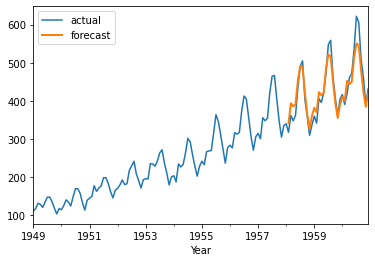

In [6]:
import matplotlib.pyplot as plt

series.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Year')

簡単に予測できた